# Библиотеки

In [1]:
import sklearn
print(sklearn.__version__)

1.5.2


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split,GridSearchCV, KFold, RandomizedSearchCV, cross_val_score

from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RANSACRegressor

import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.preprocessing import KBinsDiscretizer,PowerTransformer

from sklearn.linear_model import LinearRegression,TweedieRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

# Поиск  модели

In [57]:
path_train = 'train.csv'

In [58]:
train = pd.read_csv(path_train)
print(train.shape)
train.head()

(40455, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.55,Ideal,I,SI1,61.7,55.0,1134,5.29,5.31,3.27
1,0.94,Premium,E,SI1,62.4,56.0,4580,6.27,6.24,3.90
2,0.33,Premium,E,SI2,60.0,59.0,594,4.49,4.47,2.69
3,0.31,Ideal,D,VS2,59.4,56.0,879,4.45,4.40,2.63
4,2.01,Very Good,H,SI1,62.8,59.0,17759,7.99,8.04,5.03


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [60]:
train.drop_duplicates(inplace=True)
print(train.shape)

(40377, 10)


In [61]:
size = ['x','y','z']
num = ['depth','carat','table']
cat = ['cut','color','clarity']

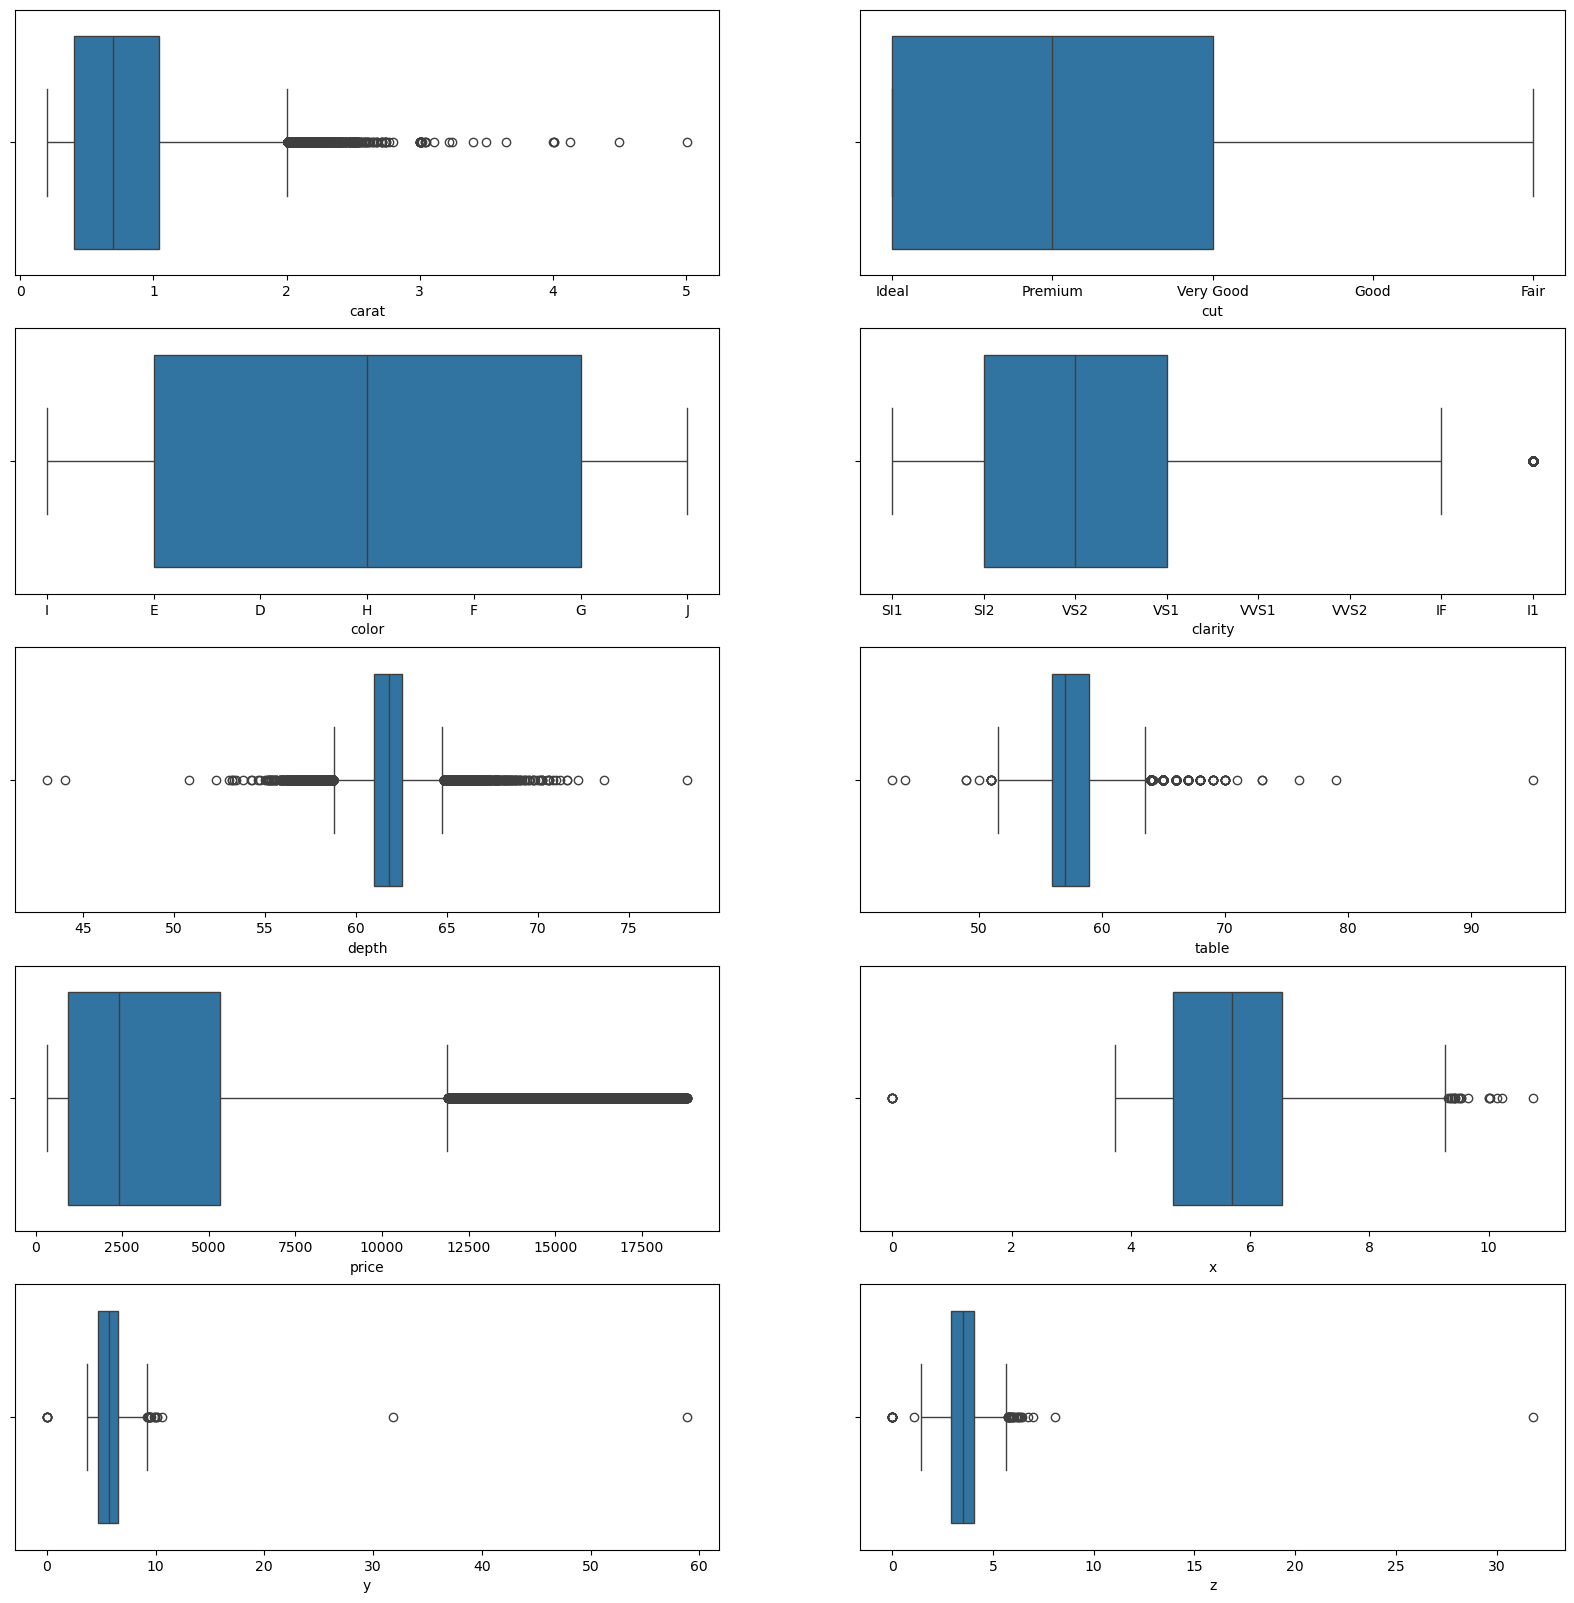

In [62]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))

for i, col in enumerate(train.columns):
    sns.boxplot(x=train[col], ax=axs[i//2, i%2])

In [63]:
train.describe()

,carat,depth,table,price,x,y,z
count,40377.00000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000
mean,0.79713,61.745600,57.452126,3938.759690,5.728777,5.732886,3.537583
std,0.47404,1.420043,2.231121,3998.041468,1.122689,1.152500,0.709028
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,946.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.000000,6.540000,6.530000,4.030000
max,5.01000,78.200000,95.000000,18818.000000,10.740000,58.900000,31.800000


In [64]:
train[(train['x']==0) | (train['y']==0) | (train['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
4817,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
7928,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10418,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
11203,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0
13661,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
15977,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
18359,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
23017,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.00,0.0
25662,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.0
32084,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.0


In [65]:
train[train['z']>10]

,carat,cut,color,clarity,depth,table,price,x,y,z
1895,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8


In [66]:
train[train['y']>20]

,carat,cut,color,clarity,depth,table,price,x,y,z
2455,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12
16230,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06


In [67]:
train['y']=np.where(train['y']>=15, train['y']/10,train['y'])
train['z']=np.where(train['z']>=15, train['z']/10,train['z'])

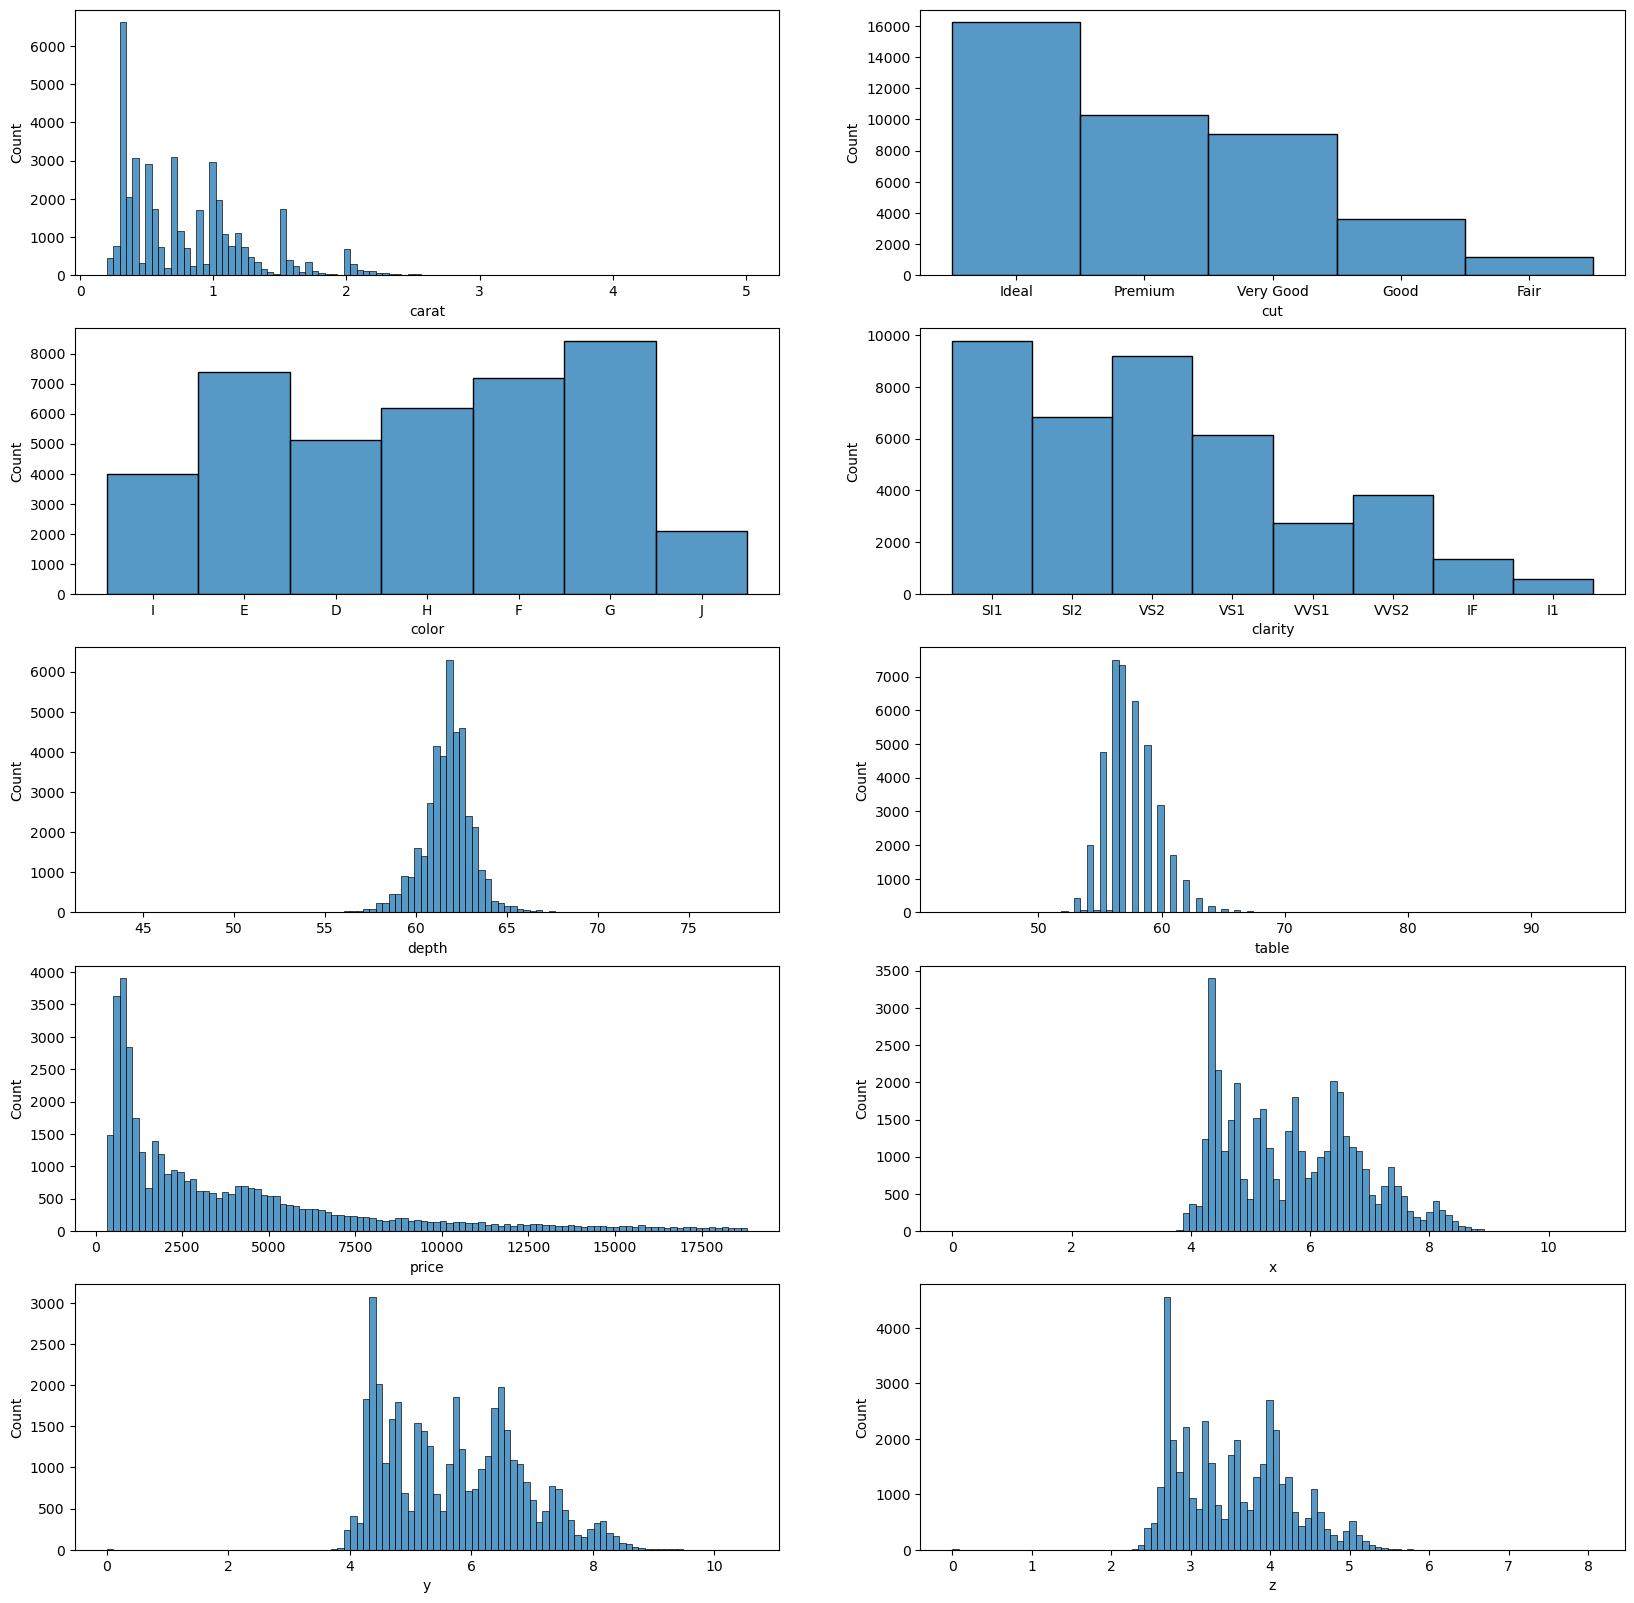

In [68]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))

for i, col in enumerate(train.columns):
    sns.histplot(x=train[col],bins=100, ax=axs[i//2, i%2])

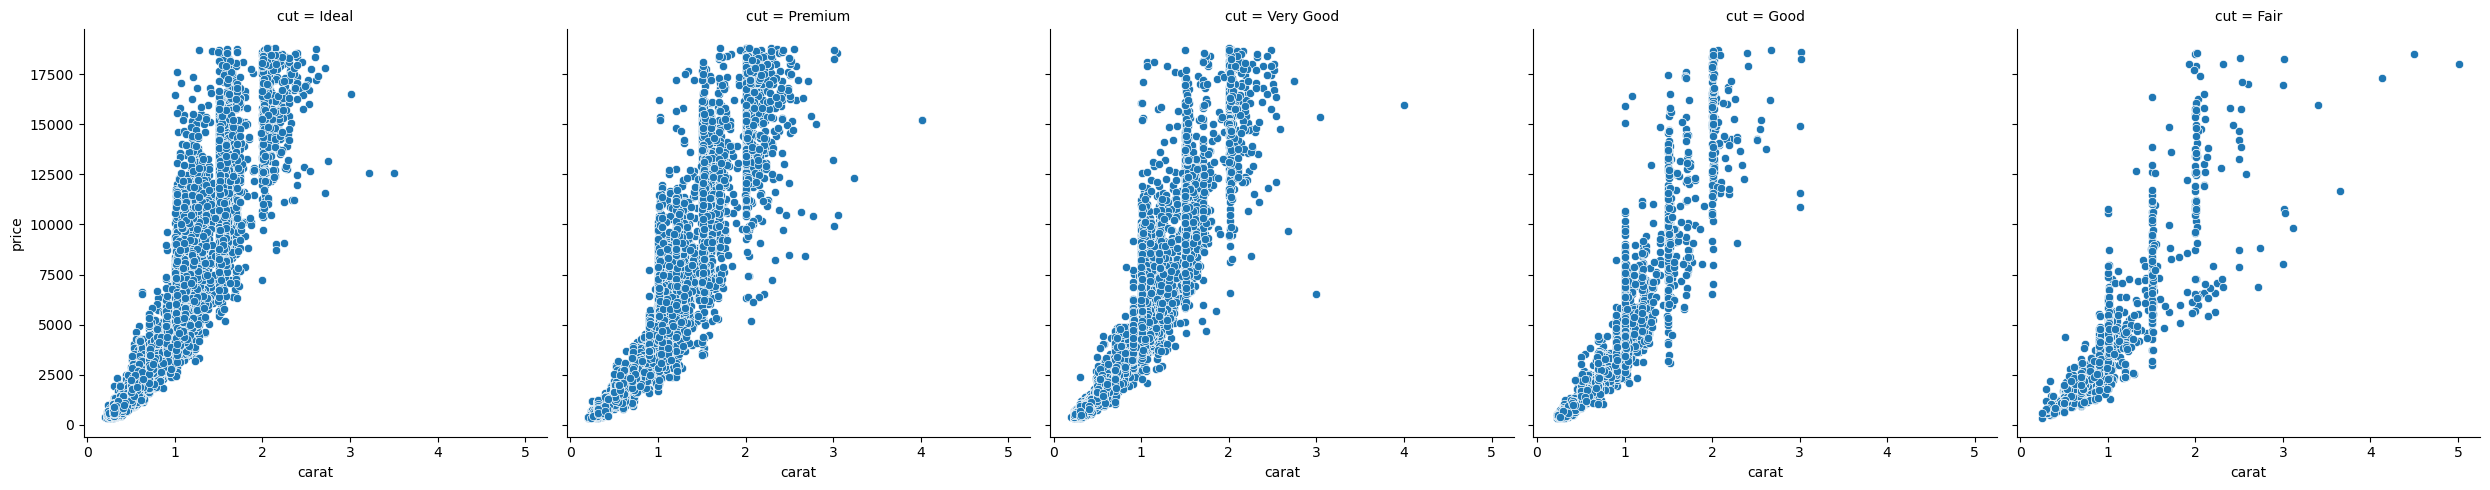

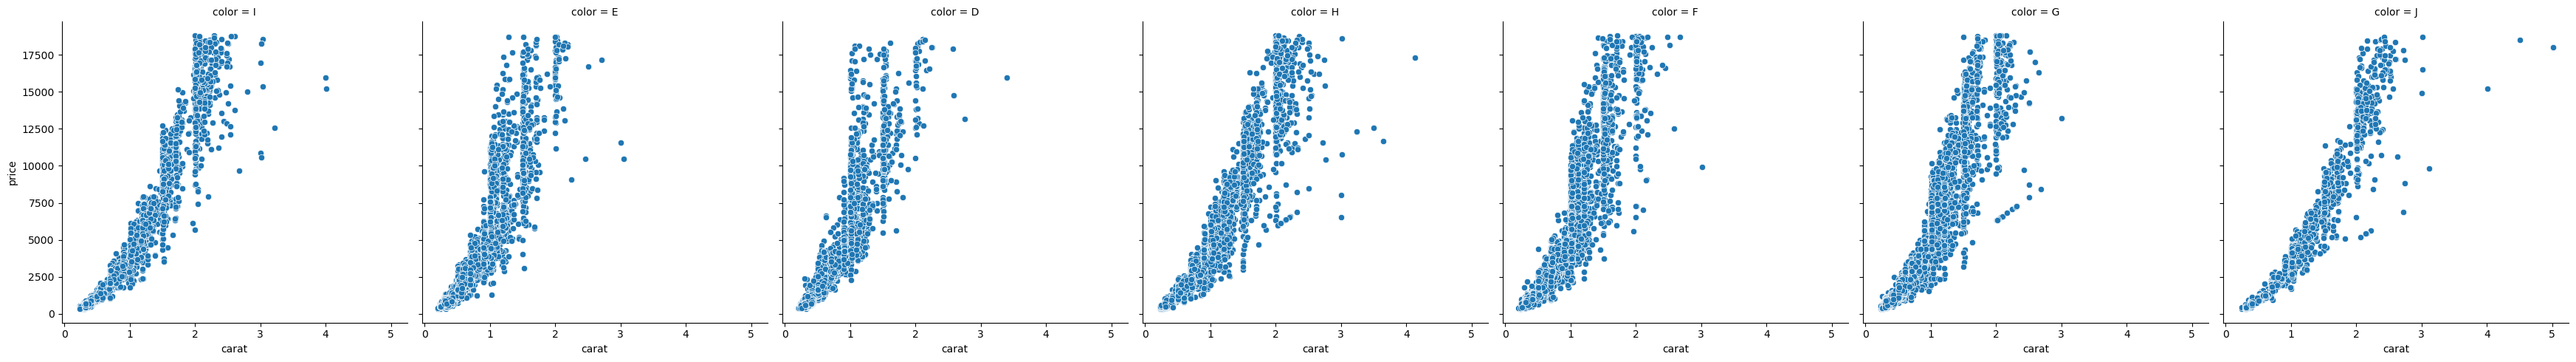

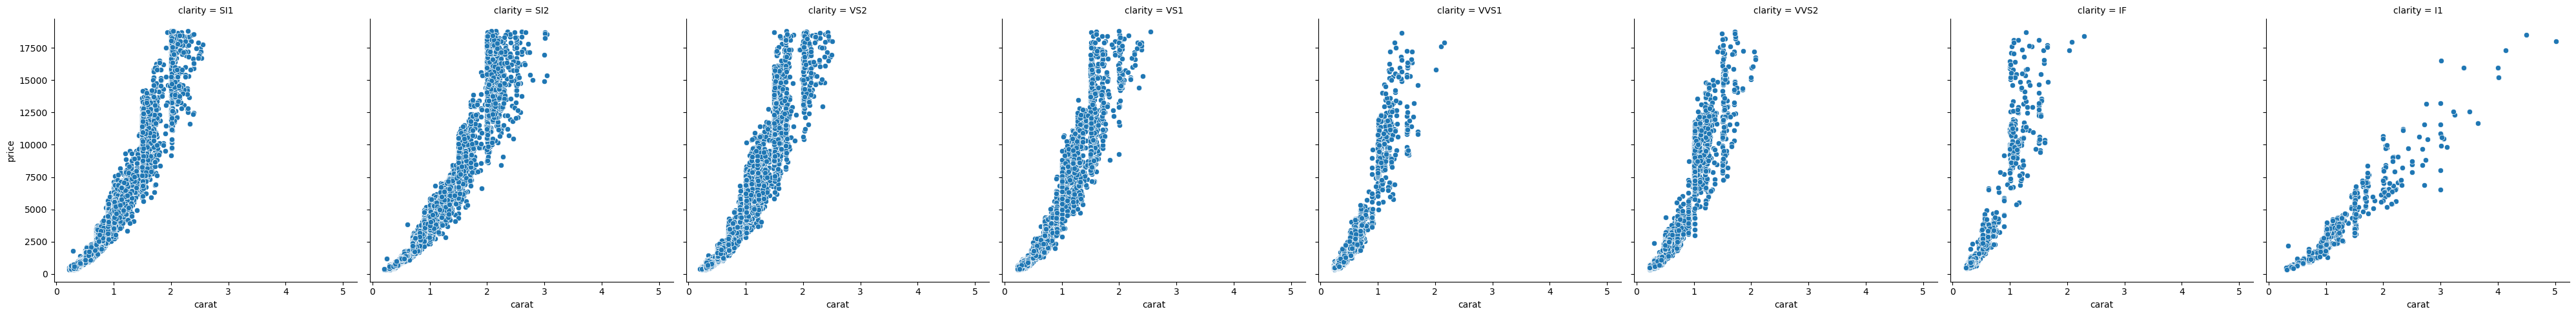

In [69]:
for i in cat:
    sns.relplot(data = train, x = 'carat', y = 'price', col = i, kind = 'scatter');

(0.0, 3.0)

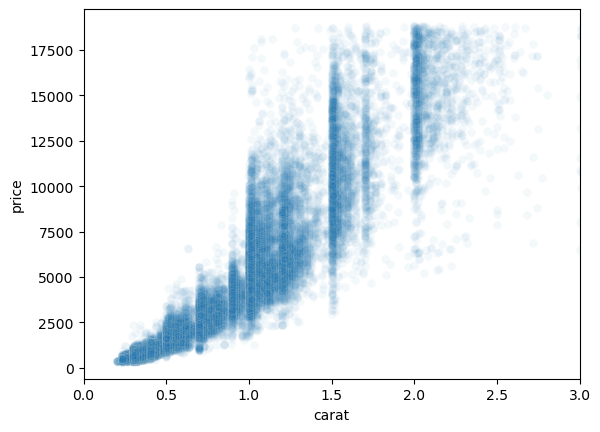

In [70]:
sns.scatterplot(data = train, x = 'carat', y = 'price', alpha=0.05);
plt.xlim(0,3)

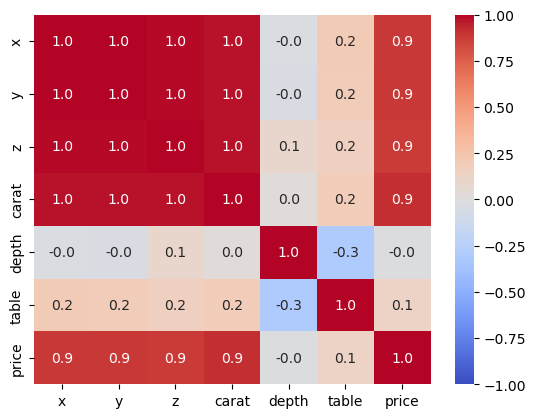

In [71]:
corr = train[['x','y','z','carat', 'depth', 'table', 'price']].corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="coolwarm", annot=True, fmt=".1f", vmin=-1, vmax=1);

Из рисунка видно, что признаки: 'depth' и 'table', мало влияют на цену ⇒ в дальнейшем я не буду их учитывать при обучении моделей

In [72]:
X = train.drop(['price'], axis=1)
y = train['price']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
print(X_test.shape)
print(y_test.shape)

(12114, 9)
(12114,)


## ColumnTransformer

In [73]:
for i in cat:
    print(i, ": ", train[i].unique())

cut :  ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
color :  ['I' 'E' 'D' 'H' 'F' 'G' 'J']
clarity :  ['SI1' 'SI2' 'VS2' 'VS1' 'VVS1' 'VVS2' 'IF' 'I1']


### CT_LR

In [74]:
size = ['x','y','z']
num = ['carat']            #depth, table
cat = ['cut','color','clarity']

cut_map = [{
    'col':'cut',
    'mapping':{'Ideal': 4,'Premium':3,'Very Good': 2,'Good':1,'Fair': 0}
    }]
cut_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=cut_map)),
    ('scaler', StandardScaler())
    ])

color_map = [{
    'col':'color',
    'mapping':{'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6}
    }]
color_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=color_map)),
    ('scaler', StandardScaler())
    ])

clarity_map = [{
    'col':'clarity',
    'mapping':{'FL':10, 'IF':9, 'VVS1':8, 'VVS2':7, 'VS1':6, 'VS2':5, 
               'SI1':4, 'SI2':3, 'I1':2, 'I2':1, 'I3':0}
    }]
clarity_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=clarity_map)),
    ('scaler', StandardScaler())
    ])   

size_FU = FeatureUnion([
        ('origin', 'passthrough'),
        ('kbin', KBinsDiscretizer(n_bins=10, strategy='quantile', encode='onehot-dense'))])

size_transformer = Pipeline(steps=[
    ('missing', KNNImputer(missing_values=0)),
    ('norm', QuantileTransformer(n_quantiles=1000, output_distribution="normal")),
    ('binning', size_FU),
    ('polynom', PolynomialFeatures(2,include_bias=False)),
    ('scaler', StandardScaler())])

num_transformer =  Pipeline(steps=[
    ('scaler', StandardScaler())])

CT_LR = ColumnTransformer([
        ("size", size_transformer, size),
        ("num", num_transformer, num),     # нужен ли imputer?
        ("cut", cut_transformer, ['cut']),
        ("color", color_transformer, ['color']),
        ("clarity", clarity_transformer, ['clarity'])], remainder='drop').set_output(transform='pandas')
CT_LR

ColumnTransformer(transformers=[('size',
                                 Pipeline(steps=[('missing',
                                                  KNNImputer(missing_values=0)),
                                                 ('norm',
                                                  QuantileTransformer(output_distribution='normal')),
                                                 ('binning',
                                                  FeatureUnion(transformer_list=[('origin',
                                                                                  'passthrough'),
                                                                                 ('kbin',
                                                                                  KBinsDiscretizer(encode='onehot-dense',
                                                                                                   n_bins=10))])),
                                                 ('polynom',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('scaler', Stan...
                                                  OrdinalEncoder(mapping=[{'col': 'color',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': J    0
I    1
H    2
G    3
F    4
E    5
D    6
dtype: int64}])),
                                                 ('scaler', StandardScaler())]),
                                 ['color']),
                                ('clarity',
                                 Pipeline(steps=[('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': FL      10
IF       9
VVS1     8
VVS2     7
VS1      6
VS2      5
SI1      4
SI2      3
I1       2
I2       1
I3       0
dtype: int64}])),
                                                 ('scaler', StandardScaler())]),
                                 ['clarity'])])

### CT_SVR

In [85]:
size = ['x','y','z']
num = ['carat']            #depth, table
cat = ['cut','color','clarity']

cut_map = [{
    'col':'cut',
    'mapping':{'Ideal': 4,'Premium':3,'Very Good': 2,'Good':1,'Fair': 0}
    }]
cut_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=cut_map)),
    ('scaler', StandardScaler())
    ])

color_map = [{
    'col':'color',
    'mapping':{'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6}
    }]
color_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=color_map)),
    ('scaler', StandardScaler())
    ])

clarity_map = [{
    'col':'clarity',
    'mapping':{'FL':10, 'IF':9, 'VVS1':8, 'VVS2':7, 'VS1':6, 'VS2':5, 
               'SI1':4, 'SI2':3, 'I1':2, 'I2':1, 'I3':0}
    }]
clarity_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=clarity_map)),
    ('scaler', StandardScaler())
    ])   

size_transformer = Pipeline(steps=[
    ('missing', KNNImputer(missing_values=0)),
    ('norm', QuantileTransformer(n_quantiles=1000, output_distribution="normal")),
    ('polynom', PolynomialFeatures(2,include_bias=False)),
    ('scaler', StandardScaler())])

num_transformer =  Pipeline(steps=[
    ('scaler', StandardScaler())])

CT_SVR = ColumnTransformer([
        ("size", size_transformer, size),
        ("num", num_transformer, num),     # нужен ли imputer?
        ("cut", cut_transformer, ['cut']),
        ("color", color_transformer, ['color']),
        ("clarity", clarity_transformer, ['clarity'])], remainder='drop').set_output(transform='pandas')
CT_SVR

ColumnTransformer(transformers=[('size',
                                 Pipeline(steps=[('missing',
                                                  KNNImputer(missing_values=0)),
                                                 ('norm',
                                                  QuantileTransformer(output_distribution='normal')),
                                                 ('polynom',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['x', 'y', 'z']),
                                ('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['carat']),
                                ('cut',
                                 Pipeline(steps=[('ce',
                                                  Ordin...
                                                  OrdinalEncoder(mapping=[{'col': 'color',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': J    0
I    1
H    2
G    3
F    4
E    5
D    6
dtype: int64}])),
                                                 ('scaler', StandardScaler())]),
                                 ['color']),
                                ('clarity',
                                 Pipeline(steps=[('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': FL      10
IF       9
VVS1     8
VVS2     7
VS1      6
VS2      5
SI1      4
SI2      3
I1       2
I2       1
I3       0
dtype: int64}])),
                                                 ('scaler', StandardScaler())]),
                                 ['clarity'])])

### CT_TR 

In [76]:
size = ['x','y','z']
num = ['carat','depth', 'table']            #depth, table
cat = ['cut','color','clarity']

size_FU = FeatureUnion([
        ('origin', 'passthrough'),
        ('kbin', KBinsDiscretizer(n_bins=10, strategy='quantile', encode='onehot-dense'))])

size_transformer = Pipeline(steps=[
    ('missing', KNNImputer(missing_values=0)),
    ('binning', size_FU),
    ('polynom', PolynomialFeatures(2,include_bias=False)),
    ('scaler', StandardScaler())])

num_transformer =  Pipeline(steps=[
    ('scaler', StandardScaler())])

cat_transformer =  Pipeline(steps=[
    ('ecoder', OneHotEncoder())])

CT_TR = ColumnTransformer([
        ("size", size_transformer, size),
        ("num", num_transformer, num),     # нужен ли imputer?
        ("cat", OneHotEncoder(), cat)], remainder='drop').set_output()
CT_TR

ColumnTransformer(transformers=[('size',
                                 Pipeline(steps=[('missing',
                                                  KNNImputer(missing_values=0)),
                                                 ('binning',
                                                  FeatureUnion(transformer_list=[('origin',
                                                                                  'passthrough'),
                                                                                 ('kbin',
                                                                                  KBinsDiscretizer(encode='onehot-dense',
                                                                                                   n_bins=10))])),
                                                 ('polynom',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['x', 'y', 'z']),
                                ('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['carat', 'depth', 'table']),
                                ('cat', OneHotEncoder(),
                                 ['cut', 'color', 'clarity'])])

### CT_KNN

In [77]:
size = ['x','y','z']
num = ['carat']            #depth, table
cat = ['cut','color','clarity']

cut_map = [{
    'col':'cut',
    'mapping':{'Ideal': 4,'Premium':3,'Very Good': 2,'Good':1,'Fair': 0}
    }]
cut_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=cut_map)),
    ('scaler', RobustScaler())
    ])

color_map = [{
    'col':'color',
    'mapping':{'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6}
    }]
color_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=color_map)),
    ('scaler', RobustScaler())
    ])

clarity_map = [{
    'col':'clarity',
    'mapping':{'FL':10, 'IF':9, 'VVS1':8, 'VVS2':7, 'VS1':6, 'VS2':5, 
               'SI1':4, 'SI2':3, 'I1':2, 'I2':1, 'I3':0}
    }]
clarity_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=clarity_map)),
    ('scaler', RobustScaler())
    ])   

size_transformer = Pipeline(steps=[
    ('missing', KNNImputer(missing_values=0)),
    ('scaler', RobustScaler())])


num_transformer =  Pipeline(steps=[
    ('scaler', RobustScaler())])

CT_KNN = ColumnTransformer([
        ("size", size_transformer, size),
        ("num", num_transformer, num),     # нужен ли imputer?
        ("cut", cut_transformer, ['cut']),
        ("color", color_transformer, ['color']),
        ("clarity", clarity_transformer, ['clarity'])], remainder='drop').set_output(transform='pandas')

## Метрика

In [78]:
def irq_mse(y_true, y_predict):
    delta = y_predict-y_true
    Q25 = np.quantile(delta, 0.25)
    Q75 = np.quantile(delta, 0.75)
    irq = Q75-Q25
    mask = (delta<(Q25-1.5*irq)) | (delta > (Q75+1.5*irq))
    if (mask.sum()==0):
        rez=0
    else: rez = -sum((delta[mask])**2) / mask.sum()
    return rez

In [79]:
irq_mse_score = make_scorer(irq_mse)
irq_mse_score

make_scorer(irq_mse, response_method='predict')

In [80]:
cv = KFold(n_splits=5)

In [26]:
pipe = Pipeline([('preprocessing', CT_LR), 
                 ('clf',  LinearRegression(n_jobs=-1))])

cv = KFold(n_splits=5)

model_LR = make_pipeline(CT_LR, LinearRegression(n_jobs=-1) )
model_LR.fit(X_train,y_train)

y_pred_LR = model_LR.predict(X_test)

print('irq_mse', irq_mse(y_test, y_pred_LR))
print('MSE: ',mean_squared_error(y_test, y_pred_LR))

irq_mse -2.3824603581098382e+30
MSE:  1.5320592859233647e+29


### RANSAC

In [27]:
model_LR_rensac = make_pipeline(CT_LR, RANSACRegressor(LinearRegression(n_jobs=-1)))
model_LR_rensac.fit(X_train,y_train)

y_pred_LR_rensac = model_LR_rensac.predict(X_test)
print('irq_mse', irq_mse(y_test, y_pred_LR_rensac))
print('MSE: ',mean_squared_error(y_test, y_pred_LR_rensac))

irq_mse -3.7054302594144166e+31
MSE:  5.787249505375655e+30


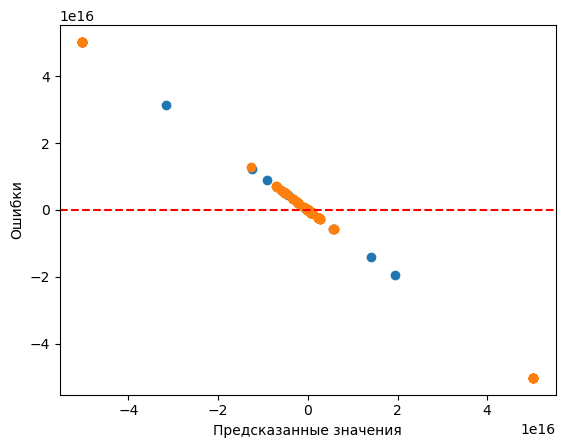

In [28]:
delta_1 = y_test - y_pred_LR
delta_2 = y_test - y_pred_LR_rensac

plt.scatter(y_pred_LR, delta_1) 
plt.scatter(y_pred_LR_rensac, delta_2) 
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения') 
plt.ylabel('Ошибки')
plt.show()

### TransformedTargetRegressor 

In [29]:
model_target_ransac_LR =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT_LR),
                                ('estimator', RANSACRegressor(LinearRegression(n_jobs=-1)))
                            ]),
                transformer=QuantileTransformer(n_quantiles=1000, output_distribution="normal")
)

model_target_ransac_LR.fit(X_train, y_train)

y_pred_target_ransac_LR = model_target_ransac_LR.predict(X_test)
print('irq_mse', irq_mse(y_test, y_pred_target_ransac_LR))
print('MSE: ',mean_squared_error(y_test, y_pred_target_ransac_LR))

irq_mse -6326516.311580184
MSE:  1119316.4349203154


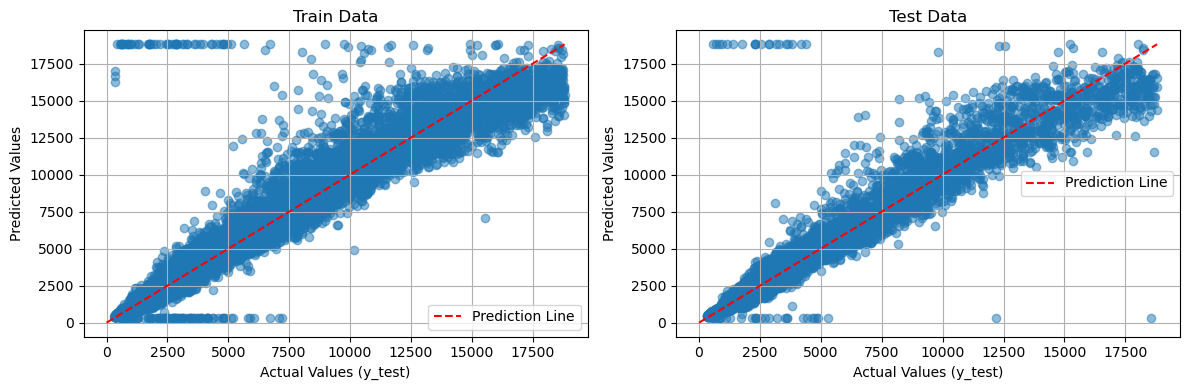

In [31]:
pred_train = model_target_ransac_LR.predict(X_train)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].scatter(y_train, pred_train, alpha=0.5)
axes[0].plot(np.linspace(0, np.max(y_train), 100), np.linspace(0, np.max(y_train), 100), '--', color='red', label='Prediction Line')
axes[0].set_title('Train Data')
axes[0].set_xlabel('Actual Values (y_test)')
axes[0].set_ylabel('Predicted Values')
axes[0].legend()
axes[0].grid(True)
axes[1].scatter(y_test, y_pred_target_ransac_LR, alpha=0.5)
axes[1].plot(np.linspace(0, np.max(y_test), 100), np.linspace(0, np.max(y_test), 100), '--', color='red', label='Prediction Line')
axes[1].set_title('Test Data')
axes[1].set_xlabel('Actual Values (y_test)')
axes[1].set_ylabel('Predicted Values')
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()
plt.show()

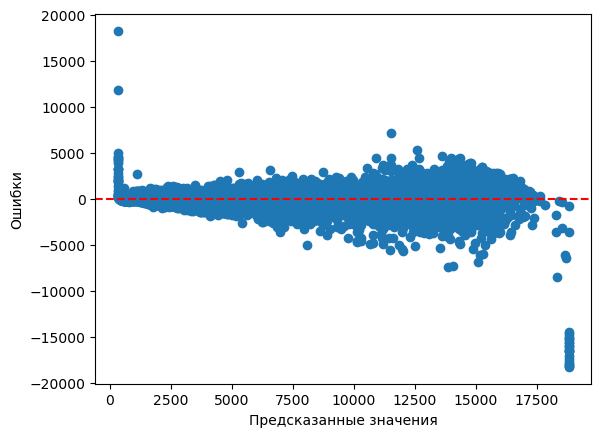

In [32]:
delta_1 = y_test - y_pred_target_ransac_LR

plt.scatter(y_pred_target_ransac_LR, delta_1) 
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения') 
plt.ylabel('Ошибки')
plt.show()

## Ridge

In [33]:
pipe = Pipeline([('preprocessing', CT_LR), 
                 ('clf',  Ridge(alpha=1.0))])

cv = KFold(n_splits=5)
alphas = np.logspace(-2, 1, 200)

param_grid =[
    { 'clf__alpha': alphas}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,139,135,199,172,149,136,197,194,173,126,...,138,13,14,23,15,30,9,21,49,18
mean_fit_time,0.618304,0.618564,0.621414,0.668155,0.6206,0.616081,0.638235,0.626675,0.61551,0.652284,...,0.631687,0.637701,0.694948,0.635433,0.668654,0.61801,0.640146,0.640776,0.663897,0.622338
std_fit_time,0.005519,0.005167,0.009619,0.028244,0.007171,0.006119,0.027483,0.024413,0.004841,0.059547,...,0.029241,0.013017,0.065411,0.015515,0.0222,0.003711,0.017327,0.012856,0.026758,0.002713
mean_score_time,0.108553,0.107024,0.106224,0.109025,0.106152,0.106423,0.110025,0.10583,0.105551,0.105424,...,0.104624,0.111433,0.117547,0.106511,0.110209,0.105424,0.111425,0.10943,0.117026,0.108025
std_score_time,0.004731,0.003034,0.00194,0.003743,0.002296,0.002728,0.009614,0.002396,0.001691,0.0028,...,0.001745,0.005306,0.011944,0.001467,0.00561,0.001357,0.006021,0.003262,0.007825,0.004148
param_clf__alpha,1.245883,1.084366,10.0,3.917101,1.762914,1.122668,9.329304,8.406653,4.055461,0.79341,...,1.203378,0.015703,0.016258,0.022219,0.016832,0.028331,0.013667,0.020729,0.054789,0.018679
params,{'clf__alpha': 1.2458833642950082},{'clf__alpha': 1.0843659686896097},{'clf__alpha': 10.0},{'clf__alpha': 3.9171014908092565},{'clf__alpha': 1.762914118095948},{'clf__alpha': 1.1226677735108135},{'clf__alpha': 9.329304026284687},{'clf__alpha': 8.406652885618325},{'clf__alpha': 4.0554607358408274},{'clf__alpha': 0.7934096665797492},...,{'clf__alpha': 1.2033778407775892},{'clf__alpha': 0.015702901247293774},{'clf__alpha': 0.01625755666443794},{'clf__alpha': 0.02221946860939524},{'clf__alpha': 0.016831803533309566},{'clf__alpha': 0.02833096101839324},{'clf__alpha': 0.013667163564620066},{'clf__alpha': 0.02072921779595371},{'clf__alpha': 0.054789011795939424},{'clf__alpha': 0.01867913599020783}
split0_test_score,-1386709.888721,-1387769.093847,-1382777.510578,-1395312.18705,-1418419.475141,-1386208.953371,-1391941.315305,-1385229.280414,-1409106.707824,-1414193.900926,...,-2234562.550821,-2250701.298395,-2322087.847164,-2328315.233293,-2332832.614213,-2363980.511356,-2313288.238468,-2462614.011217,-2561017.526102,-2841472.095954
split1_test_score,-1224324.720884,-1234365.771419,-1239041.056061,-1231299.483947,-1219795.985066,-1235374.77208,-1234723.723776,-1238840.631748,-1235911.096253,-1229924.189142,...,-1234065.864066,-1228875.687019,-1244030.00006,-1234435.7543,-1239374.034848,-1230725.546075,-1227160.973596,-1228637.896572,-1225696.753403,-1232610.730899
split2_test_score,-1195066.311521,-1200112.377794,-1195114.889414,-1188480.072403,-1189288.570507,-1191244.006756,-1191414.545129,-1194665.637767,-1190798.869607,-1203563.061784,...,-1198010.042965,-1210464.023515,-1197690.391685,-1197497.059392,-1187025.376545,-1197648.875561,-1197147.909654,-1199356.186383,-1193199.408733,-1191670.860864
split3_test_score,-1188506.12224,-1199213.231269,-1200952.384015,-1210129.70178,-1192397.033831,-1210979.440529,-1204394.885618,-1205994.171227,-1210418.717018,-1206740.922169,...,-1209548.635901,-1254646.933906,-1238045.308478,-1267509.706433,-1217078.659612,-1246724.728763,-1209181.072811,-1213928.589835,-1254926.134122,-1236900.31863


In [34]:
model_Ridge = make_pipeline(CT_LR, Ridge(alpha=1.2458833642950082) )
model_Ridge.fit(X_train,y_train)

y_pred_Ridge = model_Ridge.predict(X_test)

print('irq_mse', irq_mse(y_test, y_pred_Ridge))
print('MSE: ',mean_squared_error(y_test, y_pred_Ridge))

irq_mse -13699264.413844377
MSE:  1386957.9466201952


### RANSAC

In [35]:
pipe = make_pipeline(CT_LR, RANSACRegressor(Ridge(alpha=1.2458833642950082), min_samples=0.5) )

cv = KFold(n_splits=5)
min_samples = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 5, 10]

param_grid =[
    { 'ransacregressor__min_samples': min_samples}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,3,6,8,7,1,4,5,2,0,12,11,10,9
mean_fit_time,17.021093,27.771917,34.985127,31.369924,10.387934,20.571658,23.96453,13.649525,6.756732,1.989208,1.278627,0.916828,0.786291
std_fit_time,0.110904,0.286109,0.275701,0.215513,0.100702,0.114264,0.235424,0.271981,0.227745,0.360949,0.05948,0.059106,0.016065
mean_score_time,0.105752,0.110754,0.113625,0.108024,0.104953,0.113226,0.108024,0.110025,0.110225,0.110825,0.113425,0.109425,0.107683
std_score_time,0.0011,0.006155,0.010857,0.002,0.000981,0.007784,0.002281,0.008697,0.011993,0.004119,0.008595,0.006153,0.002216
param_ransacregressor__min_samples,0.4,0.7,0.9,0.8,0.2,0.5,0.6,0.3,0.1,10.0,5.0,2.0,1.0
params,{'ransacregressor__min_samples': 0.4},{'ransacregressor__min_samples': 0.7},{'ransacregressor__min_samples': 0.9},{'ransacregressor__min_samples': 0.8},{'ransacregressor__min_samples': 0.2},{'ransacregressor__min_samples': 0.5},{'ransacregressor__min_samples': 0.6},{'ransacregressor__min_samples': 0.3},{'ransacregressor__min_samples': 0.1},{'ransacregressor__min_samples': 10},{'ransacregressor__min_samples': 5},{'ransacregressor__min_samples': 2},{'ransacregressor__min_samples': 1}
split0_test_score,-1665417.987914,-1672731.608565,-1760028.471998,-1761004.266651,-1641682.871609,-1754370.996589,-1816687.859312,-1838291.74213,-1793407.791719,-2624024.403552,-9954191.299457,-10035201.142003,-10446185.674559
split1_test_score,-1367260.460248,-1355018.405363,-1345958.116,-1351265.396954,-1369074.974519,-1337206.063618,-1353809.648528,-1359742.66273,-1370387.065187,-2556964.845665,-9160256.648053,-10034089.118569,-9358866.333023
split2_test_score,-1298490.044092,-1316075.375825,-1314678.146286,-1308944.61225,-1337893.165118,-1311792.630965,-1302550.46901,-1316866.204299,-1349133.996402,-6248056.804169,-6653846.647732,-7855939.652598,-9044493.021166
split3_test_score,-1306563.238731,-1321593.131125,-1275835.787415,-1292281.286045,-1368638.562493,-1297564.918795,-1366676.001141,-1387011.385838,-1394583.271828,-2145706.586461,-7713946.132328,-9277926.905295,-9176426.191304


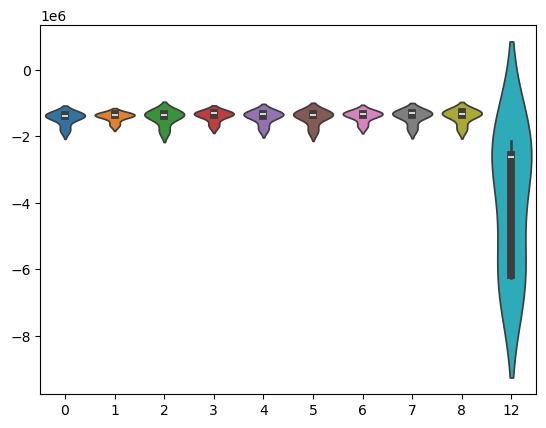

In [36]:
mask_0 = grid_result.index[grid_result.index.str.endswith("_test_score")][:-3]
tabl = grid_result.loc[mask_0].iloc[:,:10]
sns.violinplot(data=tabl);

In [41]:
model_Ridge_rensac = make_pipeline(CT_LR, RANSACRegressor(Ridge(alpha=1.2458833642950082), min_samples=0.7) )
model_Ridge_rensac.fit(X_train,y_train)

y_pred_Ridge_rensac = model_Ridge_rensac.predict(X_test)
print('irq_mse', irq_mse(y_test, y_pred_Ridge_rensac))
print('MSE: ',mean_squared_error(y_test, y_pred_Ridge_rensac))

irq_mse -10127081.000933394
MSE:  1477064.7268433436


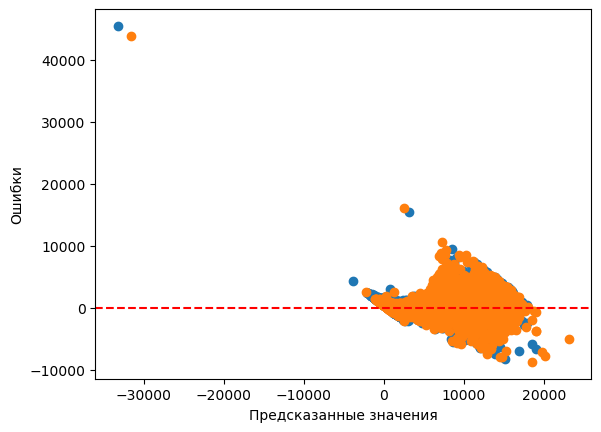

In [42]:
delta_1 = y_test - y_pred_Ridge
delta_2 = y_test - y_pred_Ridge_rensac

plt.scatter(y_pred_Ridge, delta_1) 
plt.scatter(y_pred_Ridge_rensac, delta_2) 
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения') 
plt.ylabel('Ошибки')
plt.show()

### TTR

In [44]:
model_target_Ridge =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT_LR),
                                ('estimator',Ridge(alpha=1.2458833642950082) )
                            ]),
                transformer=QuantileTransformer(n_quantiles=1000, output_distribution="normal")
)

model_target_Ridge.fit(X_train, y_train)

y_pred_target_Ridge = model_target_Ridge.predict(X_test)
print('irq_mse', irq_mse(y_test, y_pred_target_Ridge))
print('MSE: ',mean_squared_error(y_test, y_pred_target_Ridge))

irq_mse -3679201.808270923
MSE:  647040.352229108


In [45]:
model_target_ransac_Ridge =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT_LR),
                                ('estimator', RANSACRegressor(Ridge(alpha=1.2458833642950082), min_samples=0.7) )
                            ]),
                transformer=QuantileTransformer(n_quantiles=1000, output_distribution="normal")
)

model_target_ransac_Ridge.fit(X_train, y_train)

y_pred_target_ransac_Ridge = model_target_ransac_Ridge.predict(X_test)
print('irq_mse', irq_mse(y_test, y_pred_target_ransac_Ridge))
print('MSE: ',mean_squared_error(y_test, y_pred_target_ransac_Ridge))

irq_mse -3349475.6668388266
MSE:  629531.2902712398


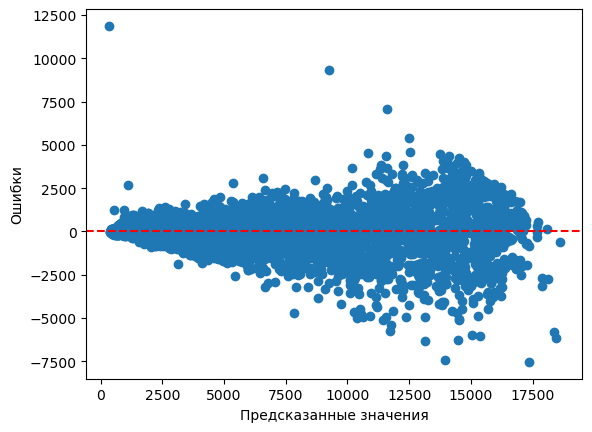

In [47]:
#delta_1 = y_tesprint('irq_mse', irq_mse(y_test, y_pred_target_ransac_Ridge))
delta_2 = y_test - y_pred_target_ransac_Ridge

#plt.scatter(y_pred_target_Ridge, delta_1) 
plt.scatter(y_pred_target_ransac_Ridge, delta_2) 
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения') 
plt.ylabel('Ошибки')
plt.show()

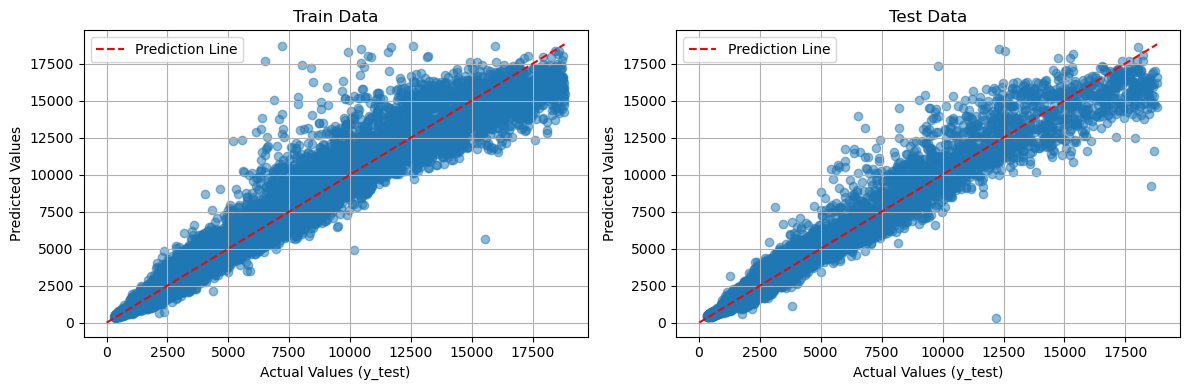

In [48]:
pred_train = model_target_ransac_Ridge.predict(X_train)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
# Plot the first graph
axes[0].scatter(y_train, pred_train, alpha=0.5)
axes[0].plot(np.linspace(0, np.max(y_train), 100), np.linspace(0, np.max(y_train), 100), '--', color='red', label='Prediction Line')
axes[0].set_title('Train Data')
axes[0].set_xlabel('Actual Values (y_test)')
axes[0].set_ylabel('Predicted Values')
axes[0].legend()
axes[0].grid(True)
# Plot the second graph
axes[1].scatter(y_test, y_pred_target_ransac_Ridge, alpha=0.5)
axes[1].plot(np.linspace(0, np.max(y_test), 100), np.linspace(0, np.max(y_test), 100), '--', color='red', label='Prediction Line')
axes[1].set_title('Test Data')
axes[1].set_xlabel('Actual Values (y_test)')
axes[1].set_ylabel('Predicted Values')
axes[1].legend()
axes[1].grid(True)
# Adjust layout
plt.tight_layout()
plt.show()

## RidgeCV

In [50]:
model_target_ransac_RidgeCV =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT_LR),
                                ('estimator', RANSACRegressor(RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_squared_error', cv=cv), min_samples=0.7) )
                            ]),
                transformer=QuantileTransformer(n_quantiles=1000, output_distribution="normal")
)

model_target_ransac_RidgeCV.fit(X_train, y_train)

y_pred_target_ransac_RidgeCV = model_target_ransac_RidgeCV.predict(X_test)
print('irq_mse', irq_mse(y_test, y_pred_target_ransac_RidgeCV))
print('MSE: ',mean_squared_error(y_test, y_pred_target_ransac_RidgeCV))

irq_mse -3428215.0742431153
MSE:  629533.8814111673


In [52]:
model_RidgeCV = make_pipeline(CT_LR,
                    RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_squared_error', cv=cv))
model_RidgeCV.fit(X_train,y_train)

y_pred_RidgeCV = model_RidgeCV.predict(X_test)
print('irq_mse', irq_mse(y_test, y_pred_RidgeCV))
print('MSE: ',mean_squared_error(y_test, y_pred_RidgeCV))

irq_mse -16498934.989243457
MSE:  1562733.7485595634


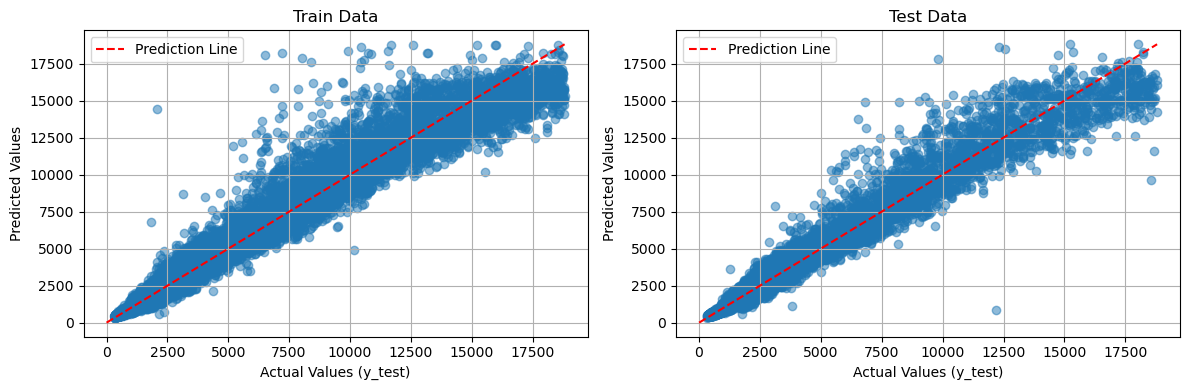

In [53]:
pred_train = model_target_ransac_RidgeCV.predict(X_train)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
# Plot the first graph
axes[0].scatter(y_train, pred_train, alpha=0.5)
axes[0].plot(np.linspace(0, np.max(y_train), 100), np.linspace(0, np.max(y_train), 100), '--', color='red', label='Prediction Line')
axes[0].set_title('Train Data')
axes[0].set_xlabel('Actual Values (y_test)')
axes[0].set_ylabel('Predicted Values')
axes[0].legend()
axes[0].grid(True)
# Plot the second graph
axes[1].scatter(y_test, y_pred_target_ransac_RidgeCV, alpha=0.5)
axes[1].plot(np.linspace(0, np.max(y_test), 100), np.linspace(0, np.max(y_test), 100), '--', color='red', label='Prediction Line')
axes[1].set_title('Test Data')
axes[1].set_xlabel('Actual Values (y_test)')
axes[1].set_ylabel('Predicted Values')
axes[1].legend()
axes[1].grid(True)
# Adjust layout
plt.tight_layout()
plt.show()

## Lasso


In [29]:
model_Lasso = make_pipeline(CT_LR,
                    Lasso(max_iter=10000000))
model_Lasso.fit(X_train,y_train)

y_pred_Lasso = model_Lasso.predict(X_test)
print('irq_mse', irq_mse(y_test, y_pred_Lasso))
print('MSE: ',mean_squared_error(y_test, y_pred_Lasso))

irq_mse -11494872.28291275
MSE:  1247546.1486702838


## TweedieRegressor

In [41]:
model_TR = make_pipeline(CT_TR, TweedieRegressor())
model_TR.fit(X_train,y_train)

y_pred_TR = model_TR.predict(X_test)
print('irq_mse', irq_mse(y_test, y_pred_TR))
print('MSE: ',mean_squared_error(y_test, y_pred_TR))

irq_mse -8429547.276166573
MSE:  1945529.7849411063


## KNN

In [47]:
pipe = Pipeline([('preprocessing', CT_KNN), 
                 ('knn',  KNeighborsRegressor(n_jobs=-1))])

cv = KFold(n_splits=5)

n_neighbors=[2,3,4,5,6,7,8,9,10,11,12,13,14]
p=[1,2,3]
weights = ['uniform', 'distance']

param_grid =[
    {'knn__n_neighbors': n_neighbors,
     'knn__p': p,
     'knn__weights': weights,
     }
]

grid = RandomizedSearchCV(pipe, param_grid, cv = cv, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,9,3,5,0,4,7,6,1,8,2
mean_fit_time,0.136362,0.126627,0.12956,0.134359,0.134366,0.147566,0.133759,0.125028,0.143832,0.125028
std_fit_time,0.009133,0.002416,0.009447,0.003764,0.014098,0.004376,0.006157,0.002829,0.008544,0.007241
mean_score_time,0.086554,0.089955,0.102625,0.090552,0.08582,0.160437,0.075816,0.071217,0.073549,0.093753
std_score_time,0.00205,0.004943,0.029944,0.004454,0.007334,0.007475,0.00519,0.00343,0.001344,0.004607
param_knn__weights,distance,distance,distance,distance,distance,distance,uniform,uniform,distance,uniform
param_knn__p,2,1,1,2,1,3,2,2,2,1
param_knn__n_neighbors,10,10,9,14,6,13,7,5,3,10
params,"{'knn__weights': 'distance', 'knn__p': 2, 'knn...","{'knn__weights': 'distance', 'knn__p': 1, 'knn...","{'knn__weights': 'distance', 'knn__p': 1, 'knn...","{'knn__weights': 'distance', 'knn__p': 2, 'knn...","{'knn__weights': 'distance', 'knn__p': 1, 'knn...","{'knn__weights': 'distance', 'knn__p': 3, 'knn...","{'knn__weights': 'uniform', 'knn__p': 2, 'knn_...","{'knn__weights': 'uniform', 'knn__p': 2, 'knn_...","{'knn__weights': 'distance', 'knn__p': 2, 'knn...","{'knn__weights': 'uniform', 'knn__p': 1, 'knn_..."
split0_test_score,-333818.617326,-337646.314243,-339228.184994,-337590.371428,-344261.844645,-343042.245379,-349805.044852,-346885.649383,-358296.162885,-359040.858629
split1_test_score,-407619.993904,-432060.442837,-432430.893782,-419763.765879,-440755.708203,-419743.421243,-431637.819012,-429180.273384,-425218.639468,-458674.652332


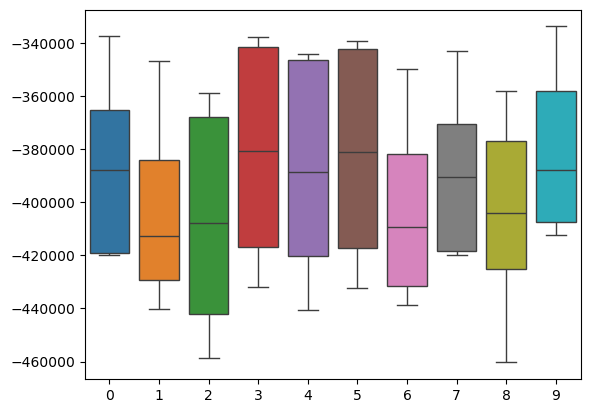

In [48]:
mask_0 = grid_result.index[grid_result.index.str.endswith("_test_score")][:-3]
tabl = grid_result.loc[mask_0].iloc[:,:10]
sns.boxplot(data=tabl);

In [52]:
grid.cv_results_['params'][9]

{'knn__weights': 'distance', 'knn__p': 2, 'knn__n_neighbors': 10}

In [82]:
model_KNR = make_pipeline(CT_KNN, KNeighborsRegressor(n_neighbors=10, p=2, weights='distance') )
model_KNR.fit(X_train,y_train)

y_pred_KNR = model_KNR.predict(X_test)
print('irq_mse: ', irq_mse(y_test, y_pred_KNR))
print('MSE: ',mean_squared_error(y_test, y_pred_KNR))

irq_mse:  -2058431.983895972
MSE:  394417.7715922223


In [51]:
model_KNR = make_pipeline(CT_KNN, KNeighborsRegressor(n_neighbors=7, p=2, weights='distance') )
model_KNR.fit(X_train,y_train)

y_pred_KNR = model_KNR.predict(X_test)
print('irq_mse: ', irq_mse(y_test, y_pred_KNR))
print('MSE: ',mean_squared_error(y_test, y_pred_KNR))

irq_mse:  -1945618.6118927845
MSE:  371231.7207964768


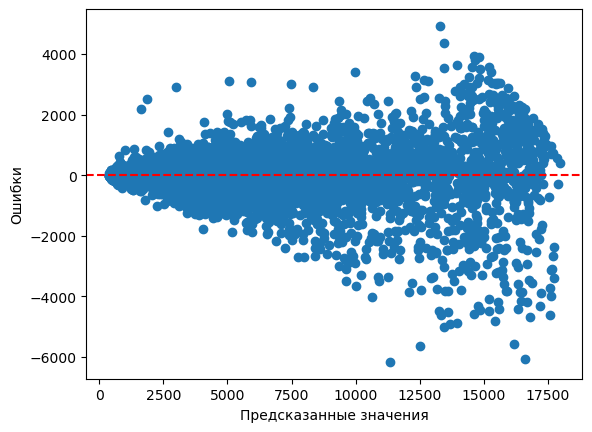

In [54]:
delta = y_test - y_pred_KNR

plt.scatter(y_pred_KNR, delta) 
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения') 
plt.ylabel('Ошибки')
plt.show()

## SVR

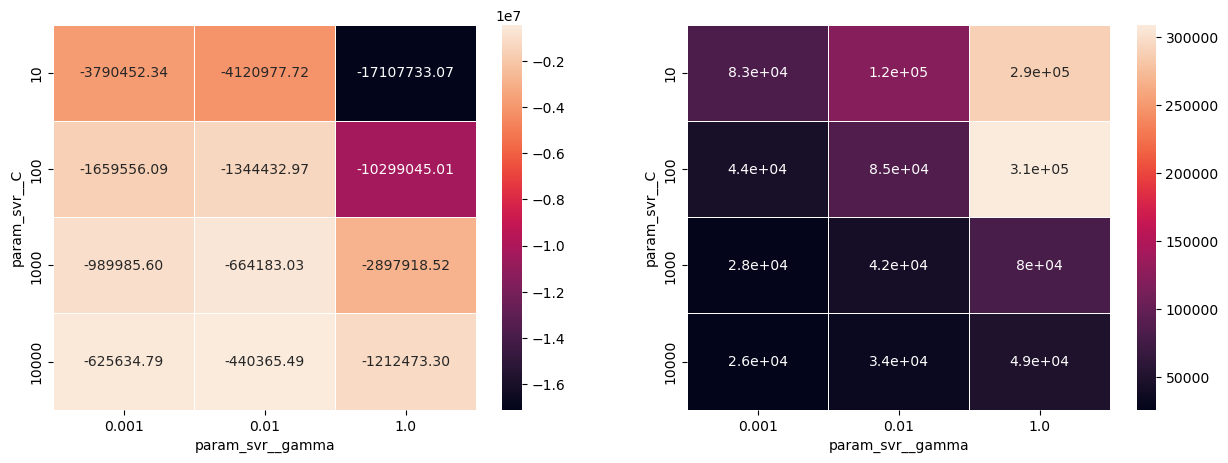

In [28]:
pipe = make_pipeline(CT_LR, SVR(C=100, gamma=1))

param_grid = {
    'svr__C' : [10, 100, 1000, 10000],
    'svr__gamma' : [0.001, 0.01, 1] 
}

grid = GridSearchCV(pipe, param_grid, cv = cv, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score'])

pv_grid_result_mean = grid_result.pivot_table(index='param_svr__C',columns='param_svr__gamma',values='mean_test_score')
pv_grid_result_std = grid_result.pivot_table(index='param_svr__C',columns='param_svr__gamma',values='std_test_score')

f, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 5))
sns.heatmap(pv_grid_result_mean, annot=True, linewidths=.5, ax=ax1, fmt=".2f")
sns.heatmap(pv_grid_result_std, annot=True, linewidths=.5, ax=ax2);

In [25]:
model_SVR = make_pipeline(CT_LR,
                     SVR(C=100, gamma=0.01))
model_SVR.fit(X_train,y_train)

y_pred_SVR = model_SVR.predict(X_test)
print('irq_mse', irq_mse(y_test, y_pred_SVR))
print('MSE: ',mean_squared_error(y_test, y_pred_SVR))

irq_mse -5321100.869979934
MSE:  1210213.8619101057


In [27]:
model_SVR = make_pipeline(CT_LR,
                     SVR(C=10000, gamma=0.01))
model_SVR.fit(X_train,y_train)

y_pred_SVR = model_SVR.predict(X_test)
print('irq_mse', irq_mse(y_test, y_pred_SVR))
print('MSE: ',mean_squared_error(y_test, y_pred_SVR))

irq_mse -1969288.5586945564
MSE:  402713.20823206


In [47]:
model_SVR = make_pipeline(CT_SVR,
                     SVR(C=100, gamma=0.01))
model_SVR.fit(X_train,y_train)

y_pred_SVR = model_SVR.predict(X_test)
print('irq_mse', irq_mse(y_test, y_pred_SVR))
print('MSE: ',mean_squared_error(y_test, y_pred_SVR))

irq_mse -4105462.8035958204
MSE:  849668.4346027485


In [48]:
model_target_SVR =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT_SVR),
                                ('estimator', SVR(C=1000, gamma=0.01))
                            ]),
                transformer=PowerTransformer()
)

model_target_SVR.fit(X_train, y_train)

y_pred_target_SVR = model_target_SVR.predict(X_test)
print('irq_mse', irq_mse(y_test, y_pred_target_SVR))
print('MSE: ',mean_squared_error(y_test, y_pred_target_SVR))

irq_mse -1712531.2875834873
MSE:  314971.8855365816


In [49]:
model_target_SVR =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT_SVR),
                                ('estimator', SVR(C=10000, gamma=0.01))
                            ]),
                transformer=PowerTransformer()
)

model_target_SVR.fit(X_train, y_train)

y_pred_target_SVR = model_target_SVR.predict(X_test)
print('irq_mse', irq_mse(y_test, y_pred_target_SVR))
print('MSE: ',mean_squared_error(y_test, y_pred_target_SVR))

irq_mse -1864173.1710316704
MSE:  343778.3876997406


In [54]:
pipe = TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT_SVR),
                                ('svr', SVR(C=10000, gamma=0.01))
                            ]),
                transformer=PowerTransformer())
param_grid = {
    'regressor__svr__C' : [100, 300, 500, 700, 900],
    'regressor__svr__gamma' : [0.01] 
}

grid = GridSearchCV(pipe, param_grid, cv = cv, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score'])
grid_result.T

,3,4,2,0,1
mean_fit_time,115.74001,145.308046,89.670681,27.564037,59.285189
std_fit_time,3.877891,3.946549,3.604805,0.592249,1.269751
mean_score_time,3.776426,3.758356,3.774412,3.939706,3.831238
std_score_time,0.035493,0.077191,0.014768,0.050701,0.024887
param_regressor__svr__C,700,900,500,100,300
param_regressor__svr__gamma,0.01,0.01,0.01,0.01,0.01
params,"{'regressor__svr__C': 700, 'regressor__svr__ga...","{'regressor__svr__C': 900, 'regressor__svr__ga...","{'regressor__svr__C': 500, 'regressor__svr__ga...","{'regressor__svr__C': 100, 'regressor__svr__ga...","{'regressor__svr__C': 300, 'regressor__svr__ga..."
split0_test_score,-336907.125541,-331828.896678,-344050.042634,-356144.169023,-346351.655479
split1_test_score,-340938.799247,-345155.32354,-348430.688248,-354751.706422,-360382.153289
split2_test_score,-373738.469097,-361924.027676,-343033.765531,-352295.290726,-355809.592868


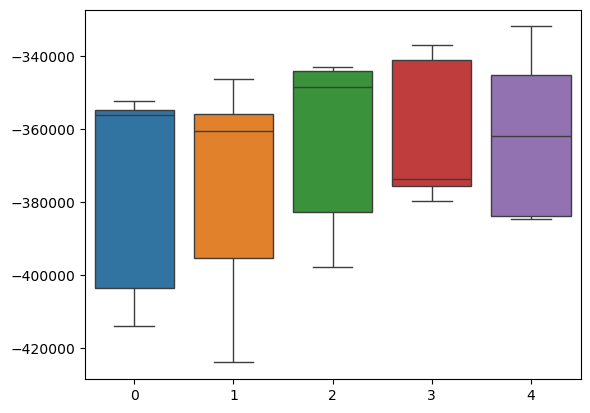

In [58]:
mask_0 = grid_result.T.index[grid_result.T.index.str.endswith("_test_score")][:-3]
tabl = grid_result.T.loc[mask_0].iloc[:,:10]
sns.boxplot(data=tabl);

In [65]:
model_target_SVR =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT_SVR),
                                ('estimator', SVR(C=700, gamma=0.01))
                            ]),
                transformer=PowerTransformer()
)

model_target_SVR.fit(X_train, y_train)

y_pred_target_SVR = model_target_SVR.predict(X_test)
print('irq_mse', irq_mse(y_test, y_pred_target_SVR))
print('MSE: ',mean_squared_error(y_test, y_pred_target_SVR))

irq_mse -1713332.608245425
MSE:  313897.5256399792


In [59]:
model_target_SVR =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT_SVR),
                                ('estimator', SVR(C=500, gamma=0.01))
                            ]),
                transformer=PowerTransformer()
)

model_target_SVR.fit(X_train, y_train)

y_pred_target_SVR = model_target_SVR.predict(X_test)
print('irq_mse', irq_mse(y_test, y_pred_target_SVR))
print('MSE: ',mean_squared_error(y_test, y_pred_target_SVR))

irq_mse -1717995.9854365378
MSE:  317672.82671850454


In [59]:
model_target_SVR =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT_SVR),
                                ('estimator', SVR(C=500, gamma=0.01))
                            ]),
                transformer=PowerTransformer()
)

model_target_SVR.fit(X_train, y_train)

y_pred_target_SVR = model_target_SVR.predict(X_test)
print('irq_mse', irq_mse(y_test, y_pred_target_SVR))
print('MSE: ',mean_squared_error(y_test, y_pred_target_SVR))

irq_mse -1717995.9854365378
MSE:  317672.82671850454


In [66]:
pipe = TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT_SVR),
                                ('svr', SVR(C=10000, gamma=0.01))
                            ]),
                transformer=PowerTransformer())
param_grid = {
    'regressor__svr__C' : [100,300,500,800,1000],
    'regressor__svr__gamma' : [0.01] 
}

grid = GridSearchCV(pipe, param_grid, cv = cv, scoring=irq_mse_score)
grid.fit(X_train, y_train)

grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score'])
grid_result.T

,4,1,3,0,2
mean_fit_time,157.182661,58.586579,129.824734,27.298291,87.83102
std_fit_time,3.235646,0.466398,4.926442,0.745401,1.608153
mean_score_time,3.71233,3.811507,3.733205,3.900042,3.756582
std_score_time,0.021375,0.015612,0.009247,0.011788,0.008795
param_regressor__svr__C,1000,300,800,100,500
param_regressor__svr__gamma,0.01,0.01,0.01,0.01,0.01
params,"{'regressor__svr__C': 1000, 'regressor__svr__g...","{'regressor__svr__C': 300, 'regressor__svr__ga...","{'regressor__svr__C': 800, 'regressor__svr__ga...","{'regressor__svr__C': 100, 'regressor__svr__ga...","{'regressor__svr__C': 500, 'regressor__svr__ga..."
split0_test_score,-1712156.114691,-1825722.699679,-1753775.743361,-1824055.668462,-1770968.257946
split1_test_score,-1764612.080735,-1838737.105907,-1778363.400237,-1884034.865213,-2386928.52032
split2_test_score,-1820399.125027,-1797440.057212,-1835476.641518,-2056681.88077,-1811059.950991


In [86]:
model_target_SVR =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT_SVR),
                                ('estimator', SVR(C=1000, gamma=0.01))
                            ]),
                transformer=PowerTransformer()
)

model_target_SVR.fit(X_train, y_train)

y_pred_target_SVR = model_target_SVR.predict(X_test)
print('irq_mse', irq_mse(y_test, y_pred_target_SVR))
print('MSE: ',mean_squared_error(y_test, y_pred_target_SVR))

irq_mse -1864752.3875673576
MSE:  355700.8014121498
